In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
from collections import Counter

In [2]:
# remove space between line containing title 'Требования:' and line with the requirements themselves
# look remove_space.png
path = os.path.join(os.getcwd(), "f_text.txt")
fw = open(os.path.join(os.getcwd(), "f_write.txt"), 'w', encoding='utf-8')
cnter = -1

with open(path, encoding='utf-8') as f:
    for line in f:
        if 'Требования:' in line:
            cnter += 1
            fw.write(line)
            if next(f)=='\n': 
                continue
            else:
                fw.write(next(f))
        else:
            fw.write(line)
fw.close()

In [3]:
# create list with dates
path_date =  os.path.join(os.getcwd(), "f_date.txt")
lst_date = []
with open(path_date, encoding='utf-8') as f_date:
    for line in f_date:
        lst_date.append(line.strip('\n'))

In [4]:
date_df = pd.DataFrame(lst_date, columns=['date'])

date_df.date = date_df.date.apply(pd.to_datetime)
date_df['year'] = date_df['date'].dt.year
date_df['month_name'] = pd.to_datetime(date_df['date'].dt.month, format='%m').dt.month_name()

date_df.head()

date  year month_name
0 2021-03-20  2021      March
1 2021-03-19  2021      March
2 2021-03-19  2021      March
3 2021-03-18  2021      March
4 2021-03-18  2021      March

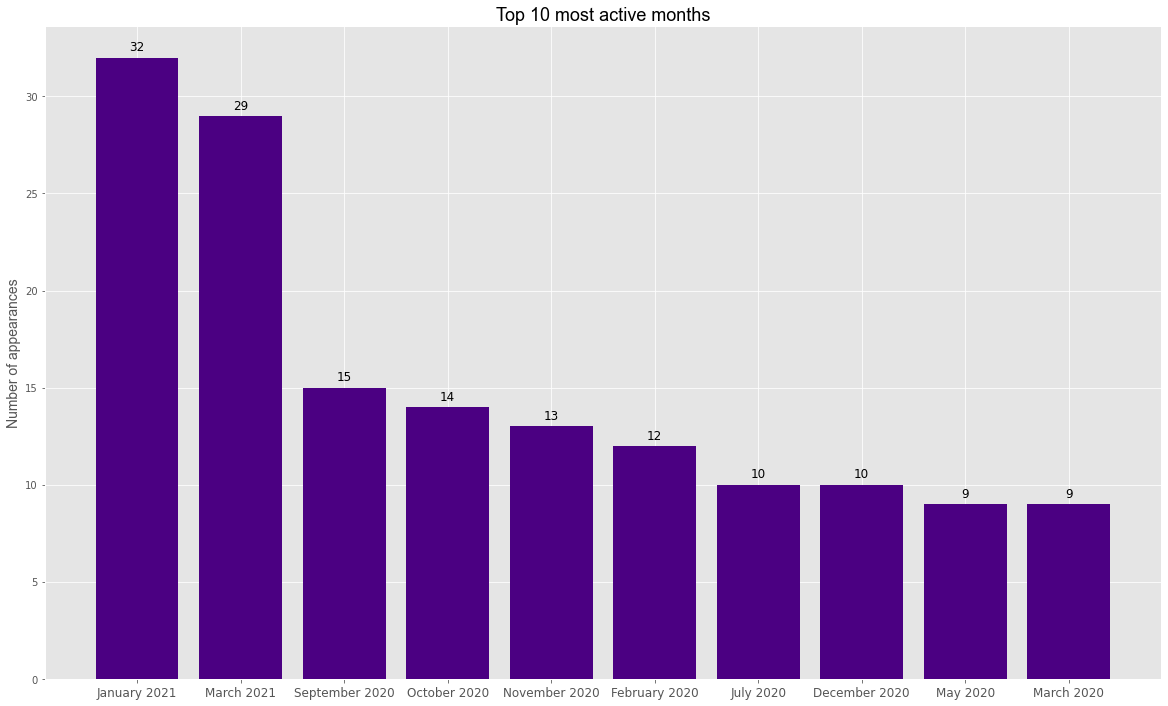

In [5]:
# data visualization: the most active months
months_by_msg = date_df.groupby(['year', 'month_name'], as_index=False).count().sort_values('date', ascending=False)[:10]
objects = months_by_msg['month_name'] + ' ' + months_by_msg['year'].astype('str')
y_pos = np.arange(len(objects))
performance = months_by_msg['date']

plt.rcParams["figure.figsize"] = (20,12)
plt.style.use('ggplot')
fig = plt.bar(y_pos, performance, align='center', color='indigo')
plt.xticks(y_pos, objects, fontsize=12);
plt.title('Top 10 most active months', {'fontname':'Arial', 'fontsize':18})
plt.ylabel('Number of appearances', {'fontname':'Arial', 'fontsize':14})

for i in fig.patches:
    plt.text(i.get_x()+i.get_width()/2, i.get_height()+0.2, i.get_height(),  ha='center', va='bottom', fontsize=12)

In [6]:
# collecting requirements
path_res = os.path.join(os.getcwd(), "f_write.txt")

rows = []
cnter = -1
with open(path_res, encoding='utf-8') as f:
    for line in f:
        if 'Требования:' in line:
            cnter +=1
            for _ in range(10):
                line = next(f)
                if line == '\n':
                    break
                else:
                    rows.append([line.strip('\n'), lst_date[cnter]])

In [7]:
df = pd.DataFrame(rows, columns = ['requirement', 'date'])
df.head(5)

requirement        date
0         - Опыт работы в сфере интернет-эквайринга;  20.03.2021
1       - Умение работать с большим массивом данных;  20.03.2021
2  - Знание принципов и технологий работы платежн...  20.03.2021
3  - Знание требований ПС в области интернет-эква...  20.03.2021
4  - Знание основных рисков в части эквайринга дл...  20.03.2021

In [8]:
# clearing 
r = re.compile(r"^\W+")
df.requirement =  df.requirement.apply(lambda x: r.sub('', x))
df.requirement =  df.requirement.str.strip(';').str.strip('.')

df.requirement = np.where(df['requirement'].str.startswith('o '), df.requirement.str.replace('o ', ''), df.requirement)

df.head()

requirement        date
0            Опыт работы в сфере интернет-эквайринга  20.03.2021
1          Умение работать с большим массивом данных  20.03.2021
2  Знание принципов и технологий работы платежных...  20.03.2021
3  Знание требований ПС в области интернет-эквайр...  20.03.2021
4  Знание основных рисков в части эквайринга для ...  20.03.2021

In [9]:
df.drop_duplicates(subset=['requirement'], ignore_index = True, inplace = True)

In [10]:
df.date = df.date.apply(pd.to_datetime)

df['year'] = df['date'].dt.year
df['month_name'] = pd.to_datetime(df['date'].dt.month, format='%m').dt.month_name()

df.head(5)

requirement       date  year  \
0            Опыт работы в сфере интернет-эквайринга 2021-03-20  2021   
1          Умение работать с большим массивом данных 2021-03-20  2021   
2  Знание принципов и технологий работы платежных... 2021-03-20  2021   
3  Знание требований ПС в области интернет-эквайр... 2021-03-20  2021   
4  Знание основных рисков в части эквайринга для ... 2021-03-20  2021   

  month_name  
0      March  
1      March  
2      March  
3      March  
4      March

In [11]:
df_req = df.copy()

In [12]:
# latin alphabet symbols only
df_req.requirement = df_req.requirement.apply(lambda x: re.sub(r'[^A-Za-z]', ' ', x))

In [13]:
rep = {"Google Analytics": "GoogleAnalytics", "Google Bigquery": "BigQuery", "Google Tag Manager": "GoogleTagManager", "Google Data Studio": "GoogleDataStudio",
       "Power Pivot": "PowerPivot", "Power Query": "PowerQuery", "Power BI": "PowerBI", "MS SQL": "MSSQL", " B ": ""}

In [14]:
rep = dict((re.escape(k), v) for k, v in rep.items())

In [15]:
pattern = re.compile("|".join(rep.keys()))

In [16]:
df_req.requirement = df_req.requirement.apply(lambda x: pattern.sub(lambda m: rep[re.escape(m.group(0))], x))

In [17]:
total_req = Counter(" ".join(df_req.requirement).split()).most_common(10)

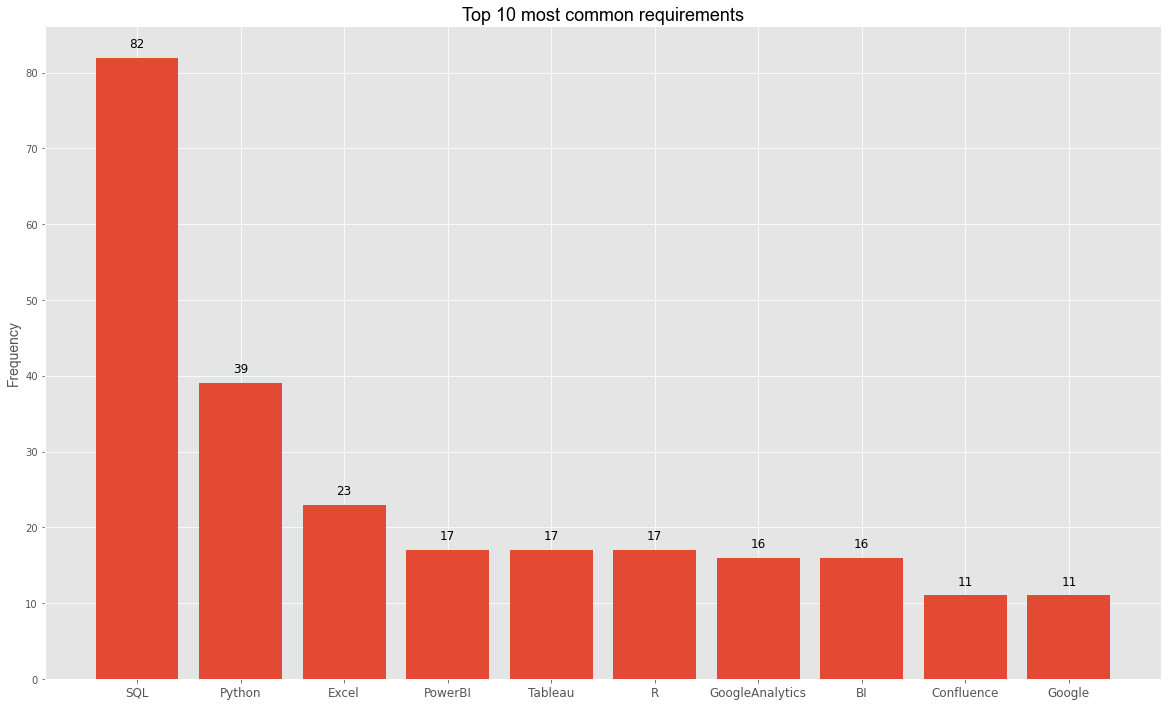

In [18]:
plt.rcParams["figure.figsize"] = (20,12)
plt.style.use('ggplot')
csfont = {'fontname':'Arial'}

vals = [i[1] for i in total_req]
inds=range(len(vals))
labels = [i[0] for i in total_req]

fig, ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Frequency', {'fontname':'Arial', 'fontsize':14})
ax.set_title('Top 10 most common requirements', {'fontname':'Arial', 'fontsize':18})

for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+1, i.get_height(),  ha='center', va='bottom', fontsize=12)

In [19]:
# split by year
cnt_req_2021 = Counter(" ".join(df_req.query('year == 2021').requirement).split()).most_common()
cnt_req_2020 = Counter(" ".join(df_req.query('year == 2020').requirement).split()).most_common()
cnt_req_2019 = Counter(" ".join(df_req.query('year == 2019').requirement).split()).most_common()
cnt_req_2018 = Counter(" ".join(df_req.query('year == 2018').requirement).split()).most_common()
cnt_req_2017 = Counter(" ".join(df_req.query('year == 2017').requirement).split()).most_common()

In [20]:
req_2021 = [i for i in cnt_req_2021 if i[0] in [i[0] for i in total_req]]
req_2020 = [i for i in cnt_req_2020 if i[0] in [i[0] for i in total_req]]
req_2019 = [i for i in cnt_req_2019 if i[0] in [i[0] for i in total_req]]
req_2018 = [i for i in cnt_req_2018 if i[0] in [i[0] for i in total_req]]
req_2017 = [i for i in cnt_req_2017 if i[0] in [i[0] for i in total_req]]

In [21]:
for i in total_req:
    if i[0] not in [j[0] for j in req_2017]:
        req_2017.append((i[0], 0))
    if i[0] not in [j[0] for j in req_2018]:
        req_2018.append((i[0], 0))
    if i[0] not in [j[0] for j in req_2019]:
        req_2019.append((i[0], 0))
    if i[0] not in [j[0] for j in req_2020]:
        req_2020.append((i[0], 0))
    if i[0] not in [j[0] for j in req_2021]:
        req_2021.append((i[0], 0))

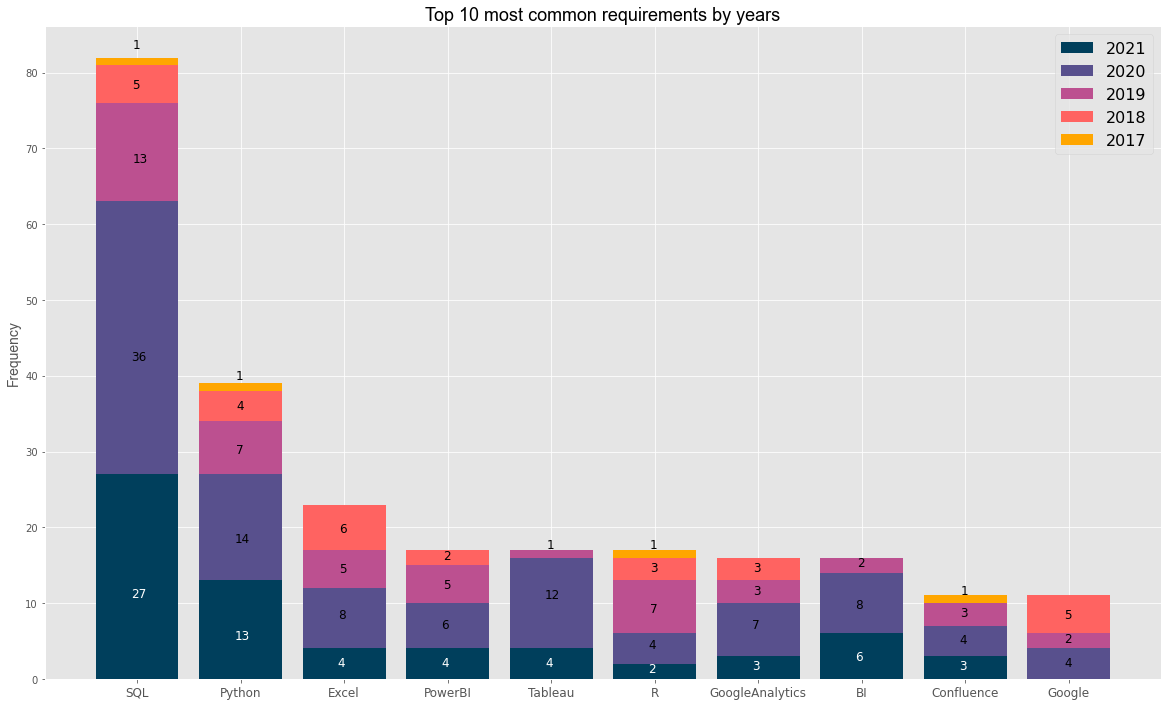

In [22]:
labels = [i[0] for i in total_req]

req_2021.sort(key=lambda x: labels.index(x[0]))
req_2020.sort(key=lambda x: labels.index(x[0]))
req_2019.sort(key=lambda x: labels.index(x[0]))
req_2018.sort(key=lambda x: labels.index(x[0]))
req_2017.sort(key=lambda x: labels.index(x[0]))

bar_2021 = np.array([i[1] for i in req_2021])
bar_2020 = np.array([i[1] for i in req_2020])
bar_2019 = np.array([i[1] for i in req_2019])
bar_2018 = np.array([i[1] for i in req_2018])
bar_2017 = np.array([i[1] for i in req_2017])


fig,ax = plt.subplots()
ax.bar(labels, bar_2021, color='#003f5c')
ax.bar(labels, bar_2020, bottom=bar_2021, color='#58508d')
ax.bar(labels, bar_2019, bottom=bar_2021+bar_2020, color='#bc5090')
ax.bar(labels, bar_2018, bottom=bar_2021+bar_2020+bar_2019, color='#ff6361')
ax.bar(labels, bar_2017, bottom=bar_2021+bar_2020+bar_2019+bar_2018, color='#ffa600')
ax.set_ylabel('Frequency', {'fontname':'Arial', 'fontsize':14})
ax.legend(["2021", "2020", "2019", "2018", "2017"], fontsize = 16)
ax.set_xticklabels(labels, fontsize = 12)
ax.set_title('Top 10 most common requirements by years', {'fontname':'Arial', 'fontsize':18})


cnt = 0
for i in list(zip(bar_2021, bar_2020, bar_2019, bar_2018, bar_2017)):
    if i[0] != 0:
        ax.text(cnt-0.06, i[0]/2.5, i[0], color='white', fontsize=12)
        ax.text(cnt-0.06, (i[1] + i[0])/1.5, i[1], fontsize=12)
    else:
        ax.text(cnt-0.045, i[0] + i[1]/2.5, i[1], fontsize=12)
    
    if i[2] != 0:
        if i[2] > 1:
            ax.text(cnt-0.045, (i[0] + i[1]) + i[2]/2.5, i[2], fontsize=12)
        else:
            ax.text(cnt-0.045, (i[0] + i[1] +i[2])/0.985, i[2], fontsize=12)
    
    
    if i[3] != 0:
            ax.text(cnt-0.045, (i[0] + i[1] +i[2]) + i[3]/2.5, i[3], fontsize=12)
            
    if i[4] != 0:
        if i[4] > 1:
            ax.text(cnt-0.045, (i[0] + i[1] +i[2] + i[3]) + i[4]/2.5, i[4], fontsize=12)
        else:
            ax.text(cnt-0.045, (i[0] + i[1] + i[2] + i[3] + i[4])/0.985, i[4], fontsize=12)
            
    cnt+=1